In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import plotly.express as px
import sqlite3

In [2]:
df = pd.read_csv('./embeddings_combined.csv')

In [ ]:
with sqlite3.connect('./database/valuator.db') as conn:
    description_df = pd.read_sql("""
    SELECT Symbol, companyName, description, industry, sector, country, IPOdate
    FROM profile_v2
    WHERE
        isFund = 0
        AND isEtf = 0
    GROUP BY companyName
    ORDER BY symbol ASC
    """, conn)

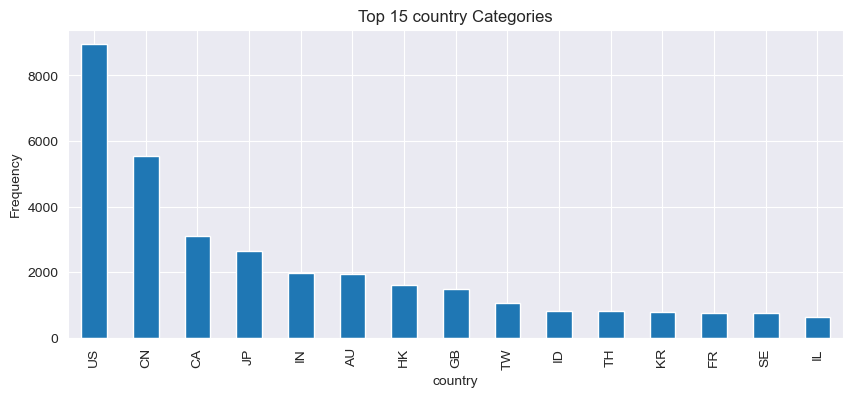

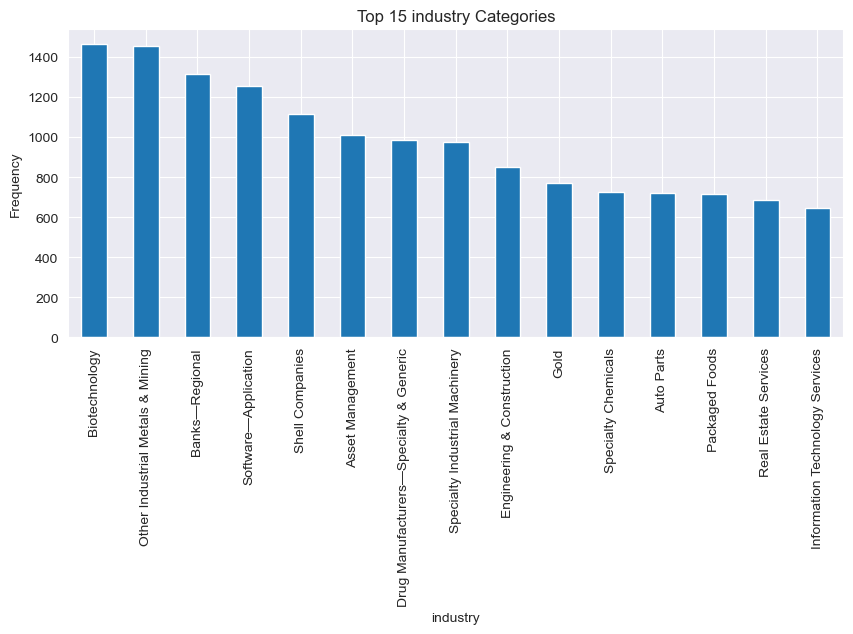

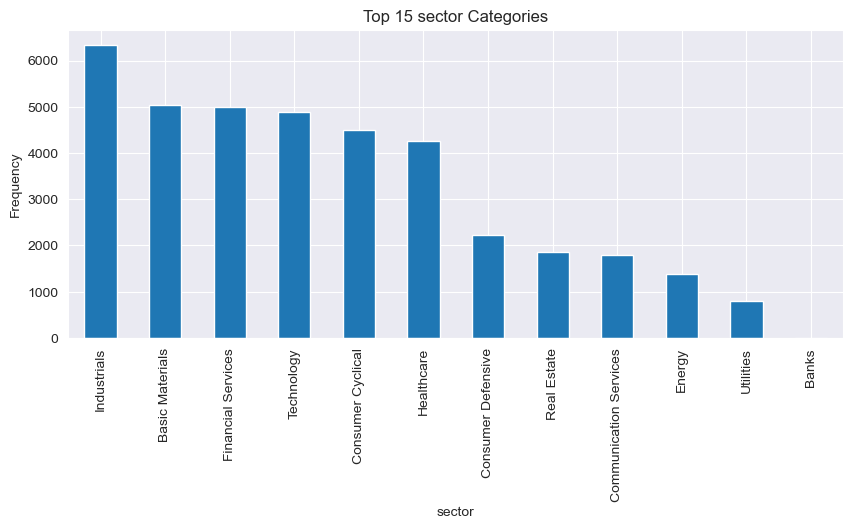

In [3]:
for column in ['country', 'industry', 'sector']:
    plt.figure(figsize=(10, 4))
    df[column].value_counts().head(15).plot(kind='bar')
    plt.title(f'Top 15 {column} Categories')
    plt.ylabel('Frequency')
    plt.show()

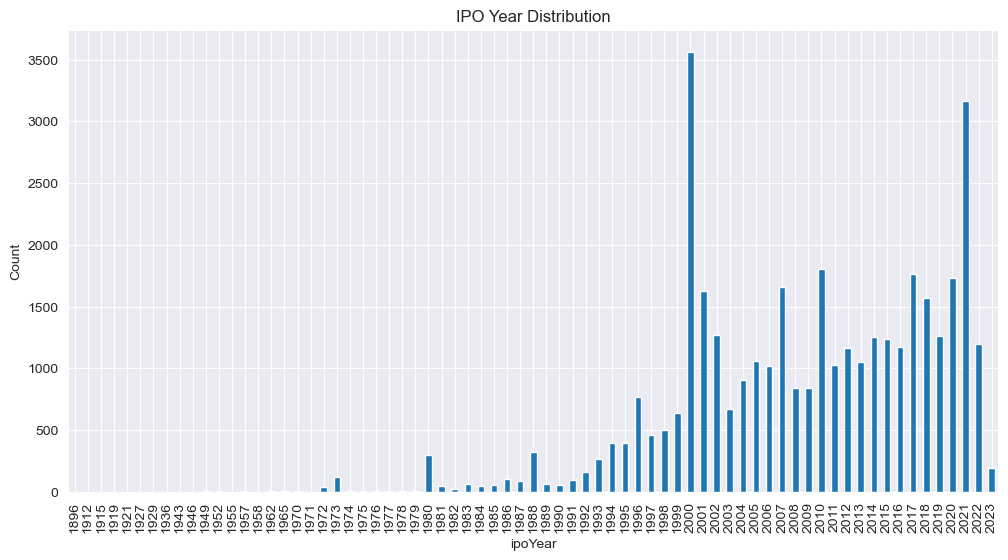

In [4]:
# 3. IPO Date Analysis
df['ipoDate'] = pd.to_datetime(df['ipoDate'])
df['ipoYear'] = df['ipoDate'].dt.year
df['ipoMonth'] = df['ipoDate'].dt.month
plt.figure(figsize=(12, 6))
df['ipoYear'].value_counts().sort_index().plot(kind='bar')
plt.title('IPO Year Distribution')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
embedding_cols = [str(i) for i in range(1024)]
scaler = StandardScaler()
df[embedding_cols] = scaler.fit_transform(df[embedding_cols])

In [ ]:
# Dimensionality Reeduction using PCA
from sklearn.decomposition import PCA
reducer = PCA()

In [ ]:
# Dimensionality Reduction using UMAP
reducer = umap.UMAP(n_components=3)

reducer.fit(df[embedding_cols])

In [6]:
df_sample = df.sample(frac=0.3)
reduced_embeddings = reducer.transform(df_sample[embedding_cols])

reduced_df = pd.DataFrame(reduced_embeddings, columns=['UMAP1', 'UMAP2', 'UMAP3'])
reduced_df['companyName'] = df_sample['companyName']
reduced_df['sector'] = df_sample['sector']

fig = px.scatter_3d(reduced_df, x='UMAP1', y='UMAP2', z='UMAP3',
                    color='sector', hover_name='companyName',
                    title='3D Scatter Plot of Company Embeddings with UMAP')
fig.show()

In [ ]:
from angle_emb import AnglE
model = AnglE.from_pretrained('WhereIsAI/UAE-Large-V1', pooling_strategy='cls').cuda()

In [5]:
def semantic_search(string, top=10, dim_reducer=None):
    if dim_reducer is not None:
        my_idea = dim_reducer.transform([model.encode(string)])[0]
        my_idea = [float(i) for i in my_idea]
        search_result = util.cos_sim(my_idea, pca_embeddings)[0]
    else:
        my_idea = model.encode(string)
        search_result = util.cos_sim(my_idea, embeddings)[0]

    rank = []
    for i in range(len(data_np)):
        rank.append([search_result[i], data_np[i]])
        rank = sorted(rank, key=lambda x: x[0], reverse=True)
    print(rank[:top])